**i) TF-IDF with Standard Machine Learning Model (SVM)**

              precision    recall  f1-score   support

   Unrelated       0.80      0.93      0.86       759
     Related       0.53      0.25      0.34       241

    accuracy                           0.77      1000
   macro avg       0.66      0.59      0.60      1000
weighted avg       0.73      0.77      0.73      1000



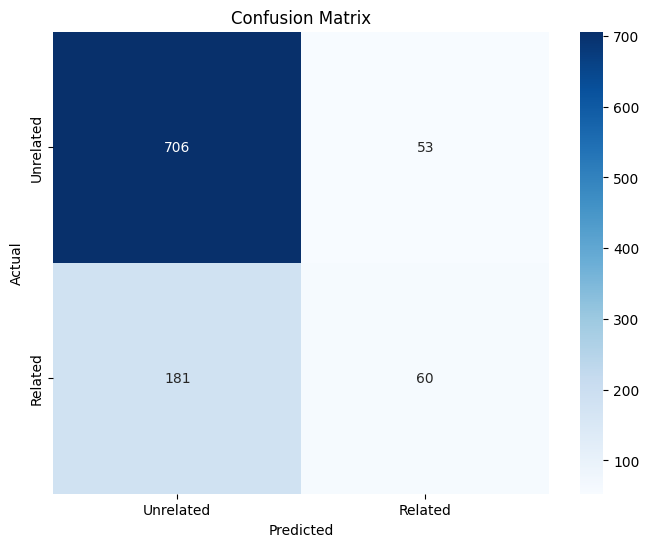

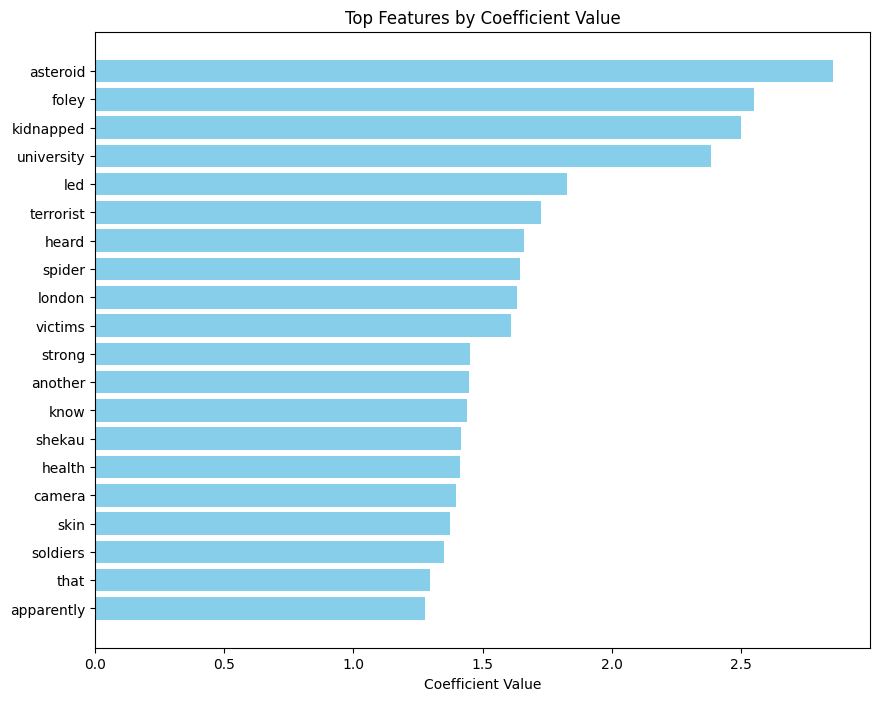

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/fakenews.xlsx'
fakenews_df = pd.read_excel(file_path)

# Prepare the data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(fakenews_df['articleBody'])
y = (fakenews_df['Stance'] != 'unrelated').astype(int)  # Binary classification: 1 for related, 0 for unrelated

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['Unrelated', 'Related'])
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unrelated', 'Related'], yticklabels=['Unrelated', 'Related'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (SVM Coefficients)
features = vectorizer.get_feature_names_out()
coefficients = svm_model.coef_.toarray().flatten()
top_n = 20  # Number of top features to display

# Get the top N features
top_features = sorted(zip(coefficients, features), reverse=True)[:top_n]
top_features = sorted(top_features, key=lambda x: x[0], reverse=True)

# Plot the top features
top_coefficients, top_feature_names = zip(*top_features)
plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top Features by Coefficient Value')
plt.gca().invert_yaxis()
plt.show()


**ii) Deep Learning Model (LSTM)**

Epoch 1/5
63/63 - 117s - loss: 0.5824 - accuracy: 0.7245 - val_loss: 0.5064 - val_accuracy: 0.7600 - 117s/epoch - 2s/step
Epoch 2/5
63/63 - 99s - loss: 0.4729 - accuracy: 0.7746 - val_loss: 0.4998 - val_accuracy: 0.7760 - 99s/epoch - 2s/step
Epoch 3/5
63/63 - 102s - loss: 0.4023 - accuracy: 0.8161 - val_loss: 0.5151 - val_accuracy: 0.7940 - 102s/epoch - 2s/step
Epoch 4/5
63/63 - 101s - loss: 0.3649 - accuracy: 0.8324 - val_loss: 0.5251 - val_accuracy: 0.7860 - 101s/epoch - 2s/step
Epoch 5/5
63/63 - 99s - loss: 0.3442 - accuracy: 0.8416 - val_loss: 0.5204 - val_accuracy: 0.7880 - 99s/epoch - 2s/step
32/32 [==============================] - 7s 187ms/step
              precision    recall  f1-score   support

   Unrelated       0.83      0.90      0.87       759
     Related       0.58      0.44      0.50       241

    accuracy                           0.79      1000
   macro avg       0.71      0.67      0.68      1000
weighted avg       0.77      0.79      0.78      1000



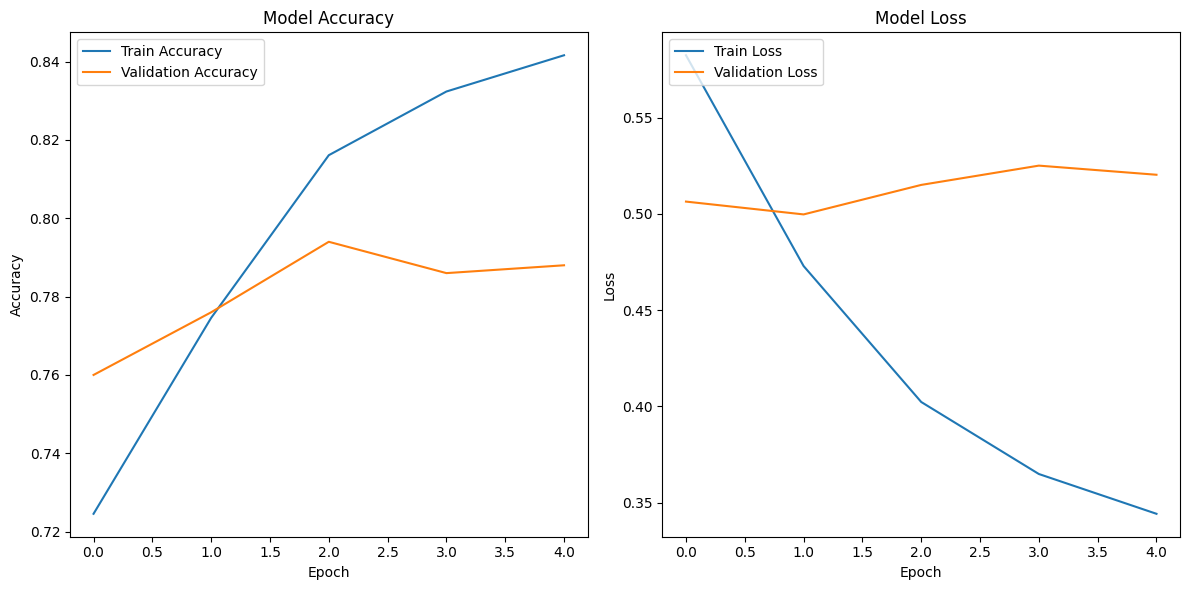

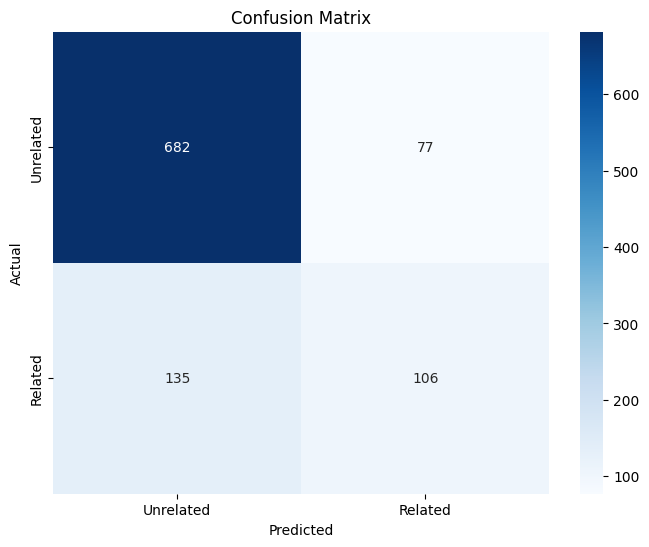

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/fakenews.xlsx'
fakenews_df = pd.read_excel(file_path)

# Prepare the data for the LSTM model
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(fakenews_df['articleBody'])
X = tokenizer.texts_to_sequences(fakenews_df['articleBody'])
X = pad_sequences(X, maxlen=500)
y = (fakenews_df['Stance'] != 'unrelated').astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
deep_learning_report = classification_report(y_test, y_pred, target_names=['Unrelated', 'Related'])
print(deep_learning_report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unrelated', 'Related'], yticklabels=['Unrelated', 'Related'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**i) Build a Deep Learning Model (RNN) using TensorFlow and Keras**

<ipython-input-19-23ebf6d2a608>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related_df['Stance'] = label_encoder.fit_transform(related_df['Stance'])


Epoch 1/5
17/17 - 1s - loss: 753.7421 - accuracy: 0.4859 - val_loss: 109.7376 - val_accuracy: 0.6180 - 1s/epoch - 77ms/step
Epoch 2/5
17/17 - 0s - loss: 292.8024 - accuracy: 0.4953 - val_loss: 73.8340 - val_accuracy: 0.6067 - 182ms/epoch - 11ms/step
Epoch 3/5
17/17 - 0s - loss: 213.2829 - accuracy: 0.5094 - val_loss: 62.9928 - val_accuracy: 0.6292 - 181ms/epoch - 11ms/step
Epoch 4/5
17/17 - 0s - loss: 137.4898 - accuracy: 0.5808 - val_loss: 36.1323 - val_accuracy: 0.6067 - 200ms/epoch - 12ms/step
Epoch 5/5
17/17 - 0s - loss: 119.6515 - accuracy: 0.5179 - val_loss: 26.8894 - val_accuracy: 0.6292 - 203ms/epoch - 12ms/step
9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       agree       0.56      0.06      0.11        81
    disagree       0.00      0.00      0.00        18
     discuss       0.64      0.97      0.77       168

    accuracy                           0.63       267
   macro avg       0.40      0.34      0.29      

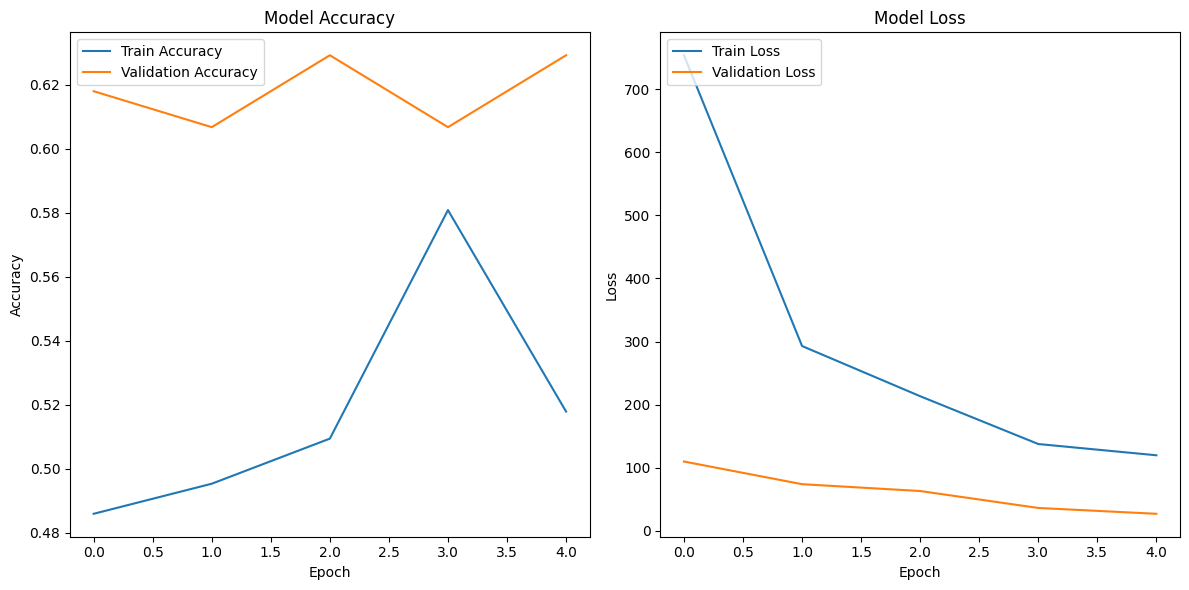

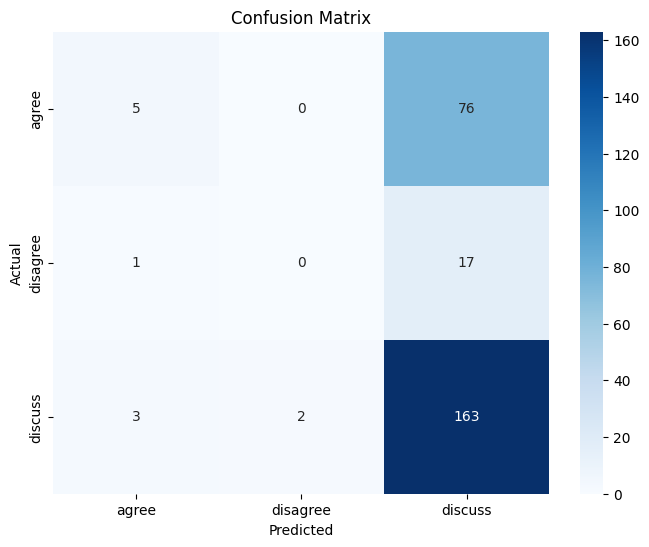

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/fakenews.xlsx'  # Update the path
fakenews_df = pd.read_excel(file_path)

# Filter the dataset to include only related samples
related_df = fakenews_df[fakenews_df['Stance'] != 'unrelated']

# Encode the labels
label_encoder = LabelEncoder()
related_df['Stance'] = label_encoder.fit_transform(related_df['Stance'])

# Prepare the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(related_df['articleBody'])
X = tokenizer.texts_to_sequences(related_df['articleBody'])
X = pad_sequences(X, maxlen=500)
y = related_df['Stance']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model
model = Sequential()
model.add(Dense(512, input_shape=(500,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
